In [1]:
import numpy as np
from IPython.display import Image


In [ ]:
马尔科夫价值决策过程:


In [ ]:
知识点1：


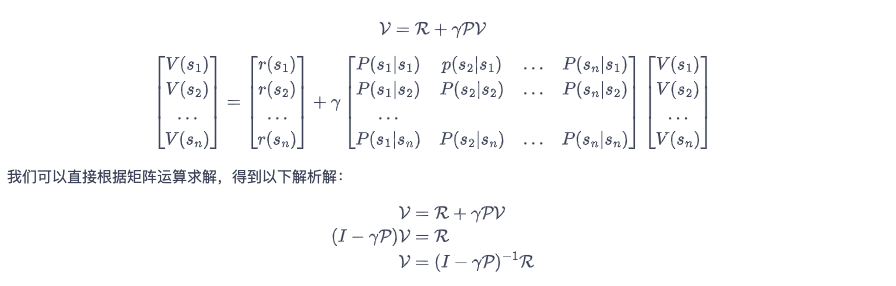

In [2]:
Image(filename='mdp-mrp.png')

In [27]:
# I是单位矩阵，单位矩阵与任何矩阵相乘，不会改变该矩阵

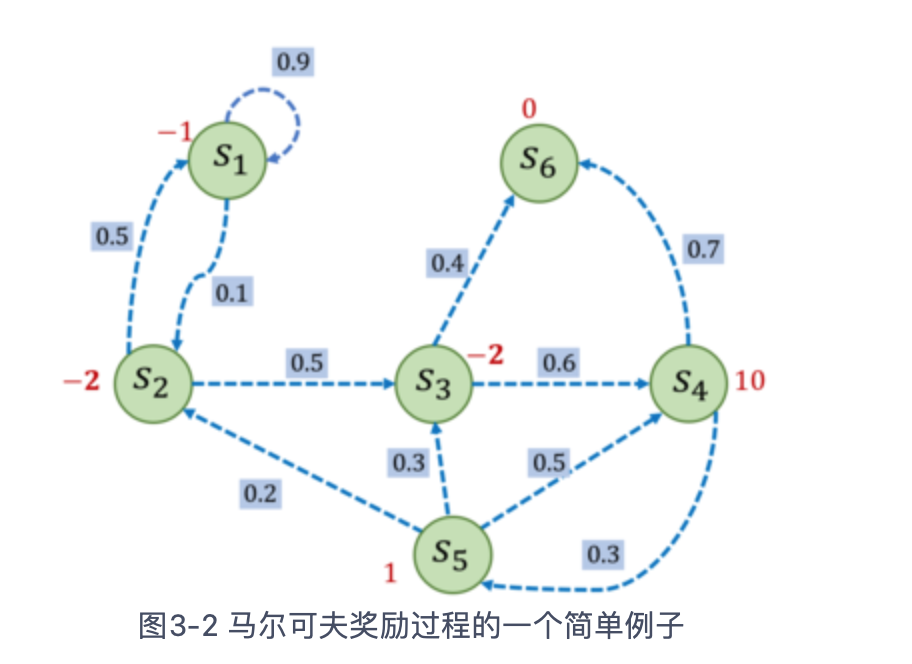

In [10]:
Image(filename="./mrp1.png")

In [4]:
np.random.seed(0)
# 定义状态转移概率矩阵P
P = [
    [0.9, 0.1, 0.0, 0.0, 0.0, 0.0],
    [0.5, 0.0, 0.5, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.6, 0.0, 0.4],
    [0.0, 0.0, 0.0, 0.0, 0.3, 0.7],
    [0.0, 0.2, 0.3, 0.5, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
]
P = np.array(P)
rewards = [-1, -2, -2, 10, 1, 0]  # 定义奖励函数
gamma = 0.5  # 定义折扣因子

In [5]:
def compute(P,rewards,gamma,states_nums):
    '''利用贝尔曼方程的矩阵形式计算'''
    rewards = np.array(rewards).reshape(-1,1)
    '''使用上图中的公式计算当前的value值'''
    value = np.dot(np.linalg.inv(np.eye(states_nums,states_nums) - gamma*P),rewards)
    return value
V = compute(P,rewards,gamma,6)
print("MRP中每个状态价值分别为\n",V)

MRP中每个状态价值分别为
 [[-2.01950168]
 [-2.21451846]
 [ 1.16142785]
 [10.53809283]
 [ 3.58728554]
 [ 0.        ]]


In [ ]:
            [
      V(s1)       [-2.01950168]
      V(s2)       [-2.21451846]
      V(s3)       [ 1.16142785]
      V(s4)       [10.53809283]
      V(s5)       [ 3.58728554]
      V(s6)       [ 0.        ]
            ]

In [19]:
# 状态价值函数 state-value function
# 定义：从状态s出发，使用策略π能够得到的期望回报

$V^π{(s)} = E_π{[G_t{|S_t{=s}}]}$

In [ ]:
# 动作价值函数 action-value function
# 在MDP遵循策略π时，对当前状态s执行动作a，得到的期望的回报

$Q^π{(s,a)=E_π{[G_t{|S_t{=s,A_t{=a}}}]}}$

In [21]:
# 状态价值函数和动作价值函数之间的关系：
# 在使用策略π时，状态s的价值 =求和( 在该状态下基于策略π采取所有动作的概率 * 相应的价值)

$V^π{(s)} = \sum_{a∈A}{π(a|s) * Q^π{(s,a)}}$

In [ ]:
# 在使用策略π时，状态s下采取动作a的价值 = 即时奖励 + 经过衰减后的所有可能的的下一个状态的状态转移概率P * 相应的价值V

$Q^π{(s,a) = r(s,a) + γ * \sum_{s^`{∈S}}{P(s^`{|s,a}) * V^π{（s^`）}}}$

In [ ]:
# 状态价值函数 和 动作价值函数 的贝尔曼期望方程

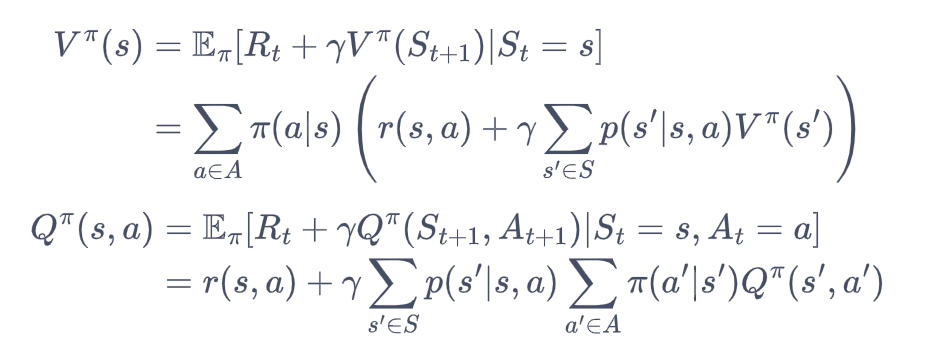

In [25]:
Image(filename="blm.png")

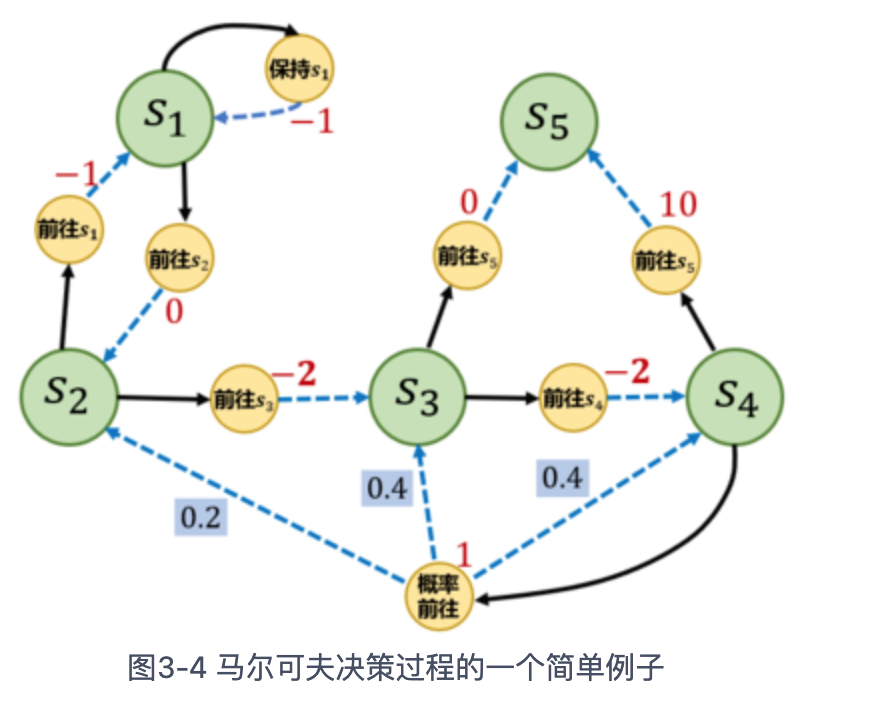

In [28]:
Image(filename="mrp2.png")

In [ ]:
# 采样函数
# 每次将  (s,a,r,s_next)元组放入序列中

In [29]:
# 状态集合
S = ["s1", "s2", "s3", "s4", "s5"]  

# 动作集合
A = ["保持s1", "前往s1", "前往s2", "前往s3", "前往s4", "前往s5", "概率前往"]  

# 状态转移函数
P = {
    "s1-保持s1-s1": 1.0,
    "s1-前往s2-s2": 1.0,
    "s2-前往s1-s1": 1.0,
    "s2-前往s3-s3": 1.0,
    "s3-前往s4-s4": 1.0,
    "s3-前往s5-s5": 1.0,
    "s4-前往s5-s5": 1.0,
    "s4-概率前往-s2": 0.2,
    "s4-概率前往-s3": 0.4,
    "s4-概率前往-s4": 0.4,
}

# 奖励函数
R = {
    "s1-保持s1": -1,
    "s1-前往s2": 0,
    "s2-前往s1": -1,
    "s2-前往s3": -2,
    "s3-前往s4": -2,
    "s3-前往s5": 0,
    "s4-前往s5": 10,
    "s4-概率前往": 1,
}
gamma = 0.5  # 折扣因子

# MDP由 状态集合、动作集合、状态转移函数、奖励函数、折扣因子 组成
MDP = (S, A, P, R, gamma)

# 策略1,随机策略
Pi_1 = {
    "s1-保持s1": 0.5,
    "s1-前往s2": 0.5,
    "s2-前往s1": 0.5,
    "s2-前往s3": 0.5,
    "s3-前往s4": 0.5,
    "s3-前往s5": 0.5,
    "s4-前往s5": 0.5,
    "s4-概率前往": 0.5,
}

In [44]:
# Pi 策略
# timestep_max 最大采样时间步
# number 总共采样序列数
def sample(MDP,Pi,timestep_max,number):
    # MDP由 状态集合、动作集合、状态转移函数、奖励函数、折扣因子 组成
    S,A,P,R,gamma = MDP
    # 总回合数据
    episodes = []
    
    for _ in range(number):
        episode = []
        timestep = 0
        # 随机选择一个起点： 随机选择一个除了s5以外的任何状态作为起点,如上图3-4
        s = S[np.random.randint(4)]
        # 当到达s5时或者时间步太长时，一次采样结束
        while s != "s5" and timestep <= timestep_max:
            timestep+=1
            rand,temp = np.random.rand(),0
            # 在状态s下根据策略选择动作
            for a_opt in A:
                temp +=Pi.get(join(s,a_opt),0)
                if temp > rand:
                    a = a_opt
                    r = R.get(join(s,a),0)
                    break
            rand,temp = np.random.rand(),0
            # 根据状态转移概率得到下一个状态s_next
            for s_opt in S:
                temp +=P.get(join(join(s,a),s_opt),0)
                if temp > rand:
                    s_next = s_opt
                    break
            #把（s,a,r,s_next）元组放入序列中
            episode.append((s,a,r,s_next))
            # 下个循环在s_next开始
            s = s_next
        episodes.append(episode)
    return episodes
# 采样5次，每个序列最长不超过20步
episodes = sample(MDP,Pi_1,20,5)
print("第一条序列\n",ellipsisp[0])
print('第二条序列\n', episodes[1])
print('第五条序列\n', episodes[4])            
            

NameError: name 'join' is not defined

In [45]:
# 对所有采样序列计算所有状态的价值
def MC(episodes,V,N,gamma):
    for episode in episodes:
        # 一个序列，从后往前计算
        for i in range(len(episode)-1,-1,-1):
            s, a, r, s_next = episode[i]
            G = r + gamma * G
            N[s] = N[s] + 1
            V[s] = V[s] + (G- V[s])/N[s]
timestep_max = 20
# 采样1000次
episodes = samle(MDP,Pi_1,timestep_max,1000)
V = {"s1": 0, "s2": 0, "s3": 0, "s4": 0, "s5": 0}
N = {"s1": 0, "s2": 0, "s3": 0, "s4": 0, "s5": 0}
MC(episodes,V,N,gamma)
print("使用蒙特卡洛方法计算MDP的状态价值：\n",V)
            

NameError: name 'samle' is not defined

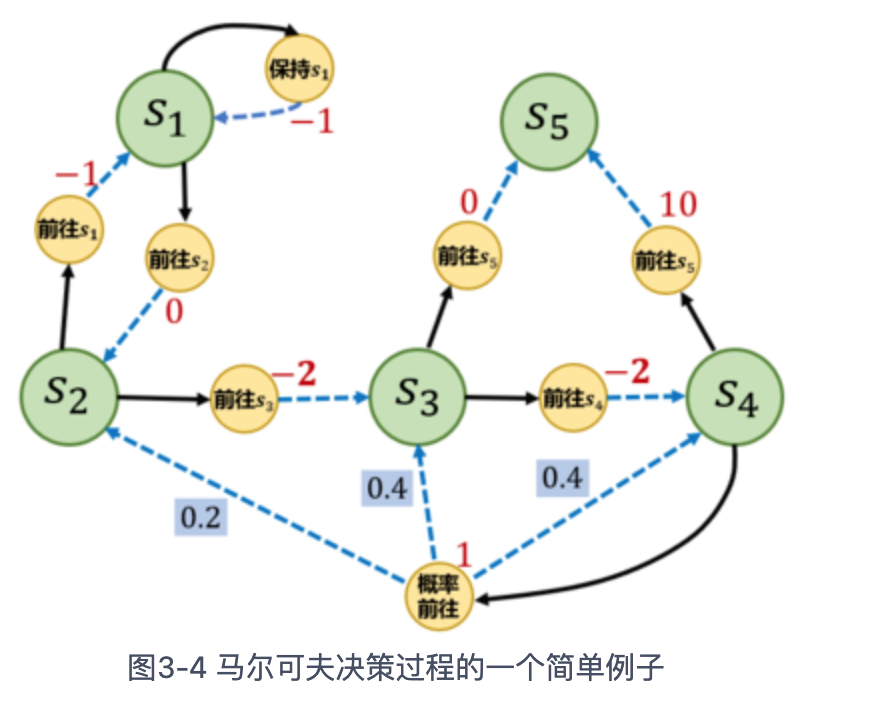

In [2]:
Image(filename="mrp2.png")

## 占用度量



3.4 节提到，不同策略的价值函数是不一样的。这是因为**对于同一个 MDP，不同策略会访问到的状态的概率分布是不同的。**

想象一下，图 3-4 的 MDP 中现在有一个策略，它的动作执行会使得智能体尽快到达终止状态$s_5$，于是当智能体处于状态$s_3$时，不会采取“前往”$s_4$的动作，而只会以 1 的概率采取“前往$s_5$”的动作，所以智能体也不会获得在$s_4$状态下采取“前往$s_5$”可以得到的很大的奖励 10。

可想而知，根据贝尔曼方程，这个策略在状态$s_3$的概率会比较小，究其原因是因为它没法到达$s_4$状态。**因此我们需要理解不同策略会使智能体访问到不同概率分布的状态，这会影响到策略的价值函数。**


**首先我们定义 MDP 的初始状态分布为$v_0{(s)}$，在有些资料中，初始状态分布会被定义进 MDP 的组成元素中。**

- $P^π_t{(s)}$表示**采取策略π使得智能体在t时刻状态为s的概率**，所以我们有$P^π_0 = v_0{(s)}$，然后就可以定义**一个策略的状态访问分布（state visitation distribution）：**


$v^π{(s)} = (1- γ)\sum^∞_{t=0}{γ^t{P^π_t{(s)}}} $

- 1-γ是用来使得概率加和为 1 的归一化因子

**状态访问概率**表示一个策略和 MDP 交互会访问到的状态的分布。

需要注意的是，**理论上在计算该分布时需要交互到无穷步之后**，**但实际上智能体和 MDP 的交互在一个序列中是有限的**。

不过我们仍然可以用以上公式来表达状态访问概率的思想，状态访问概率有如下性质：



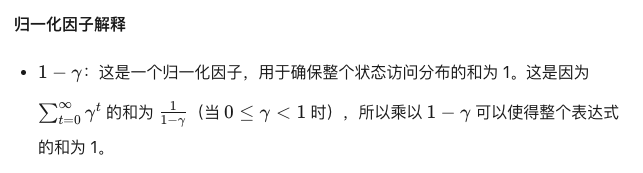

In [4]:
Image(filename='./discount.png')

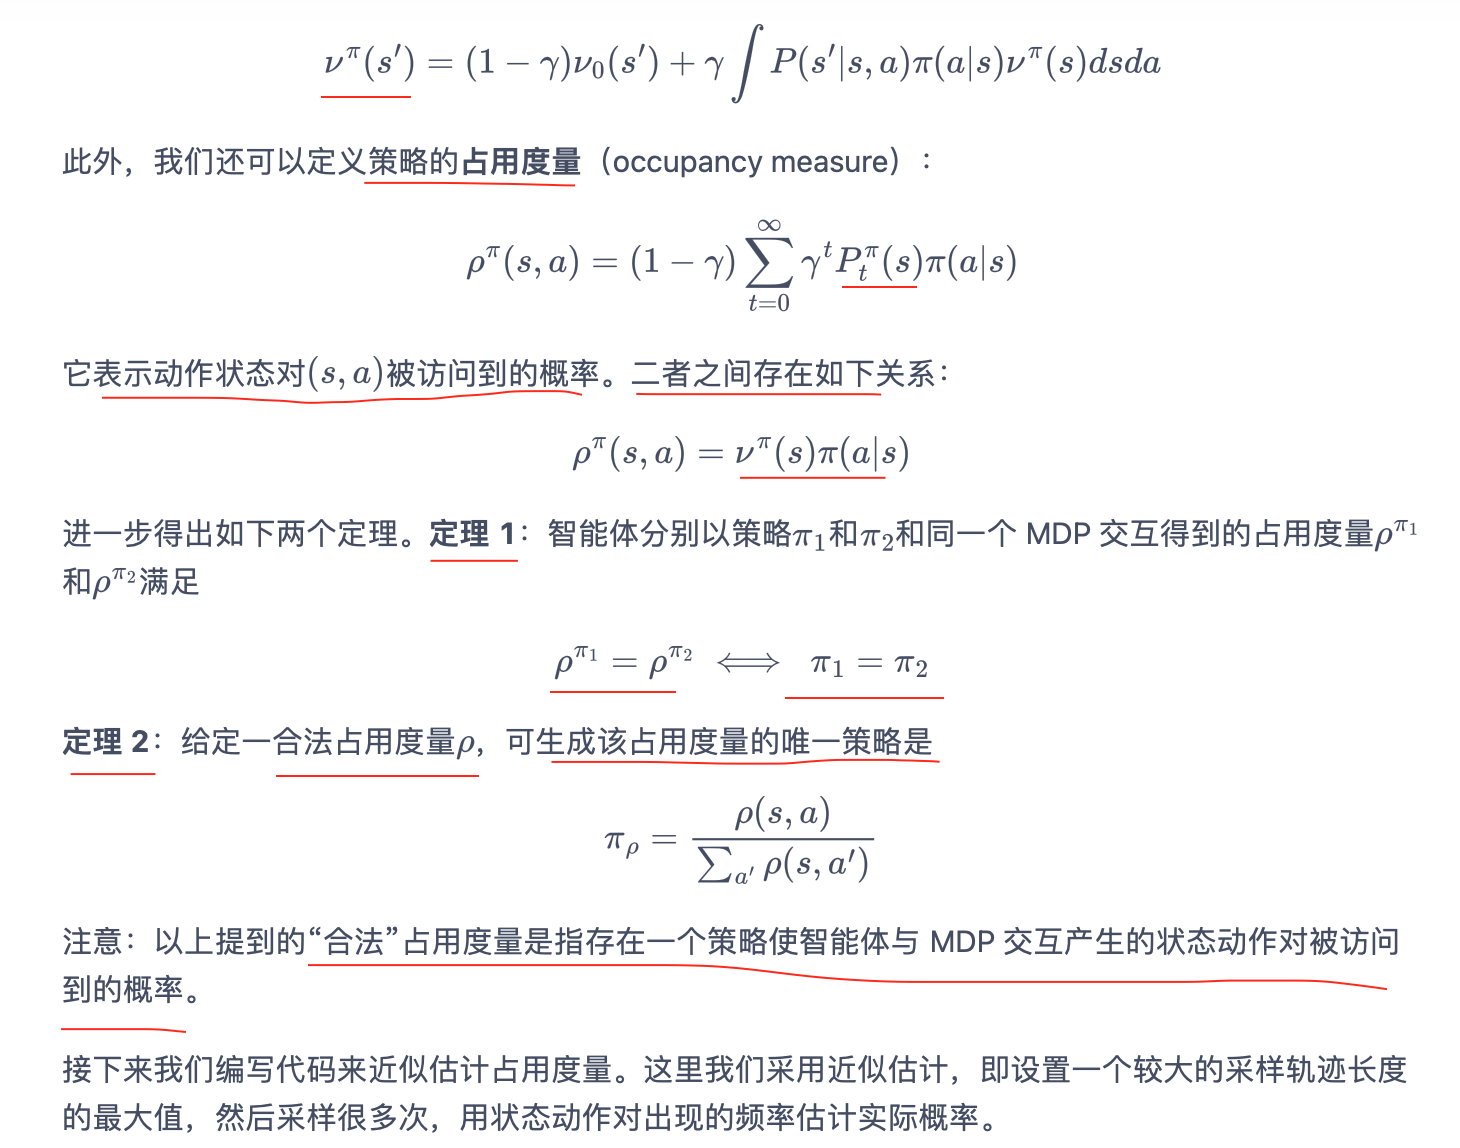

In [3]:
Image(filename='./occupancy.png')

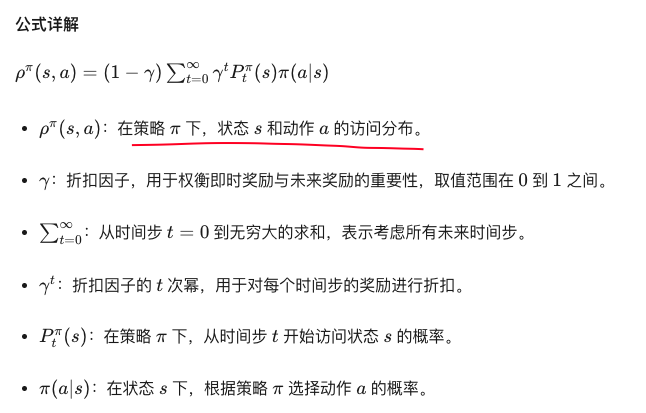

In [5]:
Image(filename='./occu.png')